## Lighthouse Labs
### W05D04 SVM
Instructor: Socorro Dominguez  
October 15, 2020

In [5]:
from sklearn.model_selection import train_test_split 

from sklearn.svm import SVC, SVR, LinearSVC

# Other
import numpy as np

from plot_classifier import plot_classifier
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**First Half Agenda:**

* SVM (Support-vector machines)
    * Classification with SVM
    

For supervised learning, data is a collection of pairs (input, output). Input could be anything, for example, email messages, pictures, or sensor measurements. 

Outputs are usually real numbers, or labels (e.g. “spam”, “not_spam”, “cat”, “dog”, “mouse”, etc). 

In some cases, outputs are vectors (e.g., four coordinates of the rectangle around a person on the picture), sequences (e.g. [“adjective”, “adjective”, “noun”] for the input “big beautiful car”), or have some other structure.

Today we will work assuming that you want to identify if a movie has possitive reviews or not. It's pretty similar to spam detection. 

We gather the data, -5,000 reviews -, each labeled as “positive” or “negative”. 
Now, we convert each review into a feature vector.

These review are turned into feature vectors - using a technique called bag of words. Take a dictionary of 20,000 English words and stipulate that in our feature vector:
* the first feature is equal to 1 if the email message contains the word “a”; otherwise, this feature is 0;
* the second feature is equal to 1 if the email message contains the word “aaron”; otherwise, this feature equals 0;
* . . .
* the feature at position 20,000 is equal to 1 if the email message contains the word “zulu”; otherwise, this feature is equal to 0.

If you repeat the above procedure for every email message in our collection, which gives us 5,000 feature vectors (each vector having the dimensionality of 20,000) and a label (“pos”/“neg”).
Don't worry too much about it. Sklearn Countvectorizer will do this for us.

Now you have machine-readable input data, but the output labels are still in the form of human-readable text. 

**SVM (Support Vector Machine)** requires that the positive label "pos" has the numeric value of +1, and the negative label “neg” the value of −1.

For SVM, every feature vector is a point in a high-dimensional space (in our case, space is 20,000-dimensional). The algorithm puts all feature vectors on an imaginary 20,000-dimensional plot and draws an imaginary 19,999-dimensional line (a hyperplane) that separates examples with positive labels from examples with negative labels. 

This boundary that separates different classes is called the decision boundary.

The equation of the hyperplane is given by two parameters, a real-valued vector $w$ of the same dimensionality as our input feature vector x, and a real number b like this:

> $wx − b = 0$

where:   

> $wx = w^{(1)}x^{(1)} + w^{(2)}x^{(2)} + . . . + w^{(D)}x^{(D)}$

and 

> D is the number of dimensions of the feature vector x

The predicted label for some input feature vector x is given like this:

> $y = sign(wx − b)$

AND **sign** is a mathematical operator that takes any value as input and returns +1 if the input is a positive number or −1 if the input is a negative number.

SVM is going to leverage the dataset and find the best values **$w^{(*)}$** and **$b^{(*)}$** for parameters $w$ and $b$. 

Then, the learning algorithm is defined as:

> $f(x) = sign(w^{(*)}x − b^{(*)})$

Now, to predict whether a **new** review is positive or negative using an SVM model, you have to take the text of the review, convert it into a feature vector, then multiply this vector by **$w^{(*)}$** , subtract **$b^{(*)}$** and take the sign of the result. 

If you get +1, then, the review is a positive review. If you get a -1, then, you have a negative review. 

We want a hyperplane that separates positive examples from negative ones with the largest margin. 

If the margin or decision boundary is large, it contributes to a better generalization, that is how well the model will classify new examples in the future. 

For two-dimensional feature vectors, we can easily visualize the solution. The blue and orange circles represent, respectively, positive and negative examples. The line given by $wx − b = 0$ is the decision boundary.

That’s how Support Vector Machines work. This particular version of the algorithm builds the so-called linear model. It’s called linear because the decision boundary is a straight line (or a plane, or a hyperplane).

<img src="img/img1.png" alt="Drawing" style="width: 400px;"/>

**NOTES**
1. Each training example either is or isn't a "support vector".
2. This gets decided during fit.
3. It does not apply to test examples.
4. Main idea: the boundary only depends on the support vectors.

In [2]:
# demo with a synthetic data set
n = 20
X = np.random.randn(n,2)
y = np.random.choice((-1,+1),size=n)
X[y>0,0] -= 2
X[y>0,1] += 2

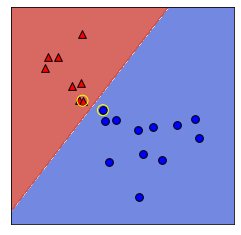

In [6]:
svm = SVC(kernel="linear", C=1e6) # ignore the C=1e6 for now
svm.fit(X,y)

plt.figure(figsize=(4,4))
plot_classifier(X,y,svm, ax=plt.gca())
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);

- The support vectors (SVs) are shown in yellow.
- These are the example that "support" the boundary. 

Below: let's try removing all other examples, keeping only the SVs.

In [14]:
sv = svm.support_
not_sv = list(set(range(n)) - set(sv))

[[-2.49294525  1.49478711]]
[[-2.49294479  1.49478684]]
The coefficients are the same!


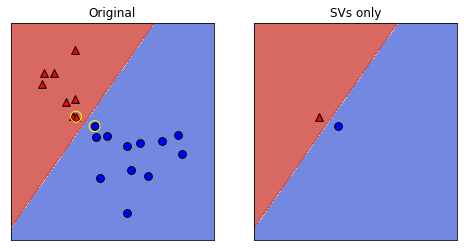

In [15]:
# remove all non-support vectors
X3 = np.delete(X,not_sv,0)
y3 = np.delete(y,not_sv,0)

svm3 = SVC(kernel="linear", C=1e6)
svm3.fit(X3,y3)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_classifier(X,y,svm, ax=plt.gca())
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.title("Original");
plt.subplot(1,2,2)
plot_classifier(X3,y3,svm3, ax=plt.gca(), lims=(X[:,0].min()-1,X[:,0].max()+1,X[:,1].min()-1,X[:,1].max()+1))
plt.title("SVs only");

print(svm.coef_)
print(svm3.coef_)
print("The coefficients are the same!")

[[-2.49294525  1.49478711]]
[[-1.27777979  1.51201698]]


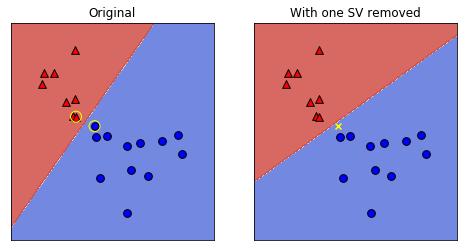

In [16]:
# remove a support vector
X2 = np.delete(X,sv[0],0)
y2 = np.delete(y,sv[0],0)

svm2 = SVC(kernel="linear", C=1e6)
svm2.fit(X2,y2);

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_classifier(X,y,svm, ax=plt.gca())
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.title("Original");

plt.subplot(1,2,2)
plot_classifier(X2,y2,svm2, ax=plt.gca())
# plt.scatter(*svm2.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.scatter(svm.support_vectors_[0,0], svm.support_vectors_[0,1], marker="x", c="yellow")
plt.title("With one SV removed");

print(svm.coef_)
print(svm2.coef_)

- The **margin** is the distance from the boundary to the nearest point(s).
- Maximizing the margin is a "maximin" problem: maximize the minimum distance to the boundary.
- Intuitively, more margin is good because it leaves more "room" before we make an error.
- Above: it looks like SVM maximizes the margin whereas logistic regression doesn't.

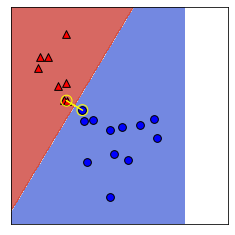

In [13]:
plt.figure()
plot_classifier(X, y, svm, ax=plt.gca());
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.axis('equal');
plt.axis('square');

def SV_proj(svm):
    v = svm.support_vectors_
    s = np.array([svm.coef_.flatten()[1], -svm.coef_.flatten()[0]])
    w = svm.coef_
    return (v@s[:,None])/(s@s) * s - w/(w@w.T)*svm.intercept_
proj = SV_proj(svm)

for i in range(len(proj)):
    p = proj[i]
    sv = svm.support_vectors_[i]
    plt.plot((p[0],sv[0]),(p[1],sv[1]), 'yellow')

### The Kernel Trick



1. What if there’s noise in the data and no hyperplane can perfectly separate positive examples from negative ones?
2. What if the data cannot be separated using a plane, but could be separated by a higher-order polynomial?

SVM can also incorporate kernels that can make the decision boundary arbitrarily non-linear. In some cases, it could be impossible to perfectly separate the two groups of points because of noise in the data, errors of labeling, or outliers. 

You can see both situations in the next figure. In the left case, the data could be separated by a straight line if not for the noise (outliers or examples with wrong labels). 

In the right case, the decision boundary is a circle and not a straight line.

<img src="img/img2.png" alt="Drawing" style="width: 500px;"/>

**Dealing with Noise**
To extend SVM to cases in which the data is not linearly separable, we introduce the Hinge Loss Function: 

$max(0, 1− y_i(wx_i − b))$. *don't worry too much about this.

The Hinge Loss Function is zero if $wx_i$ lies on the correct side of the decision boundary. 
For data on the wrong side of the decision boundary, the function’s value is proportional to the distance from the decision boundary.


By changing the Hyperparamenter C, we determine the tradeoff between increasing the size of the decision boundary and trying to get each $x_i$ in the correct side of the decision boundary. 

SVMs that optimize hinge loss are called soft-margin SVMs, while the original formulation is referred to as a hard-margin SVM.

For sufficiently high values of C, the second term in the cost function will become negligible, so the SVM algorithm will try to find the highest margin by completely ignoring misclassification. As we decrease the value of C, making classification errors is becoming more costly, so the SVM algorithm tries to make fewer mistakes by sacrificing the margin size. **A larger margin is better for generalization.**

C regulates the tradeoff between classifying the training data well (minimizing empirical risk) and classifying future examples well (generalization).

<img src="img/img4.png" alt="Drawing" style="width: 400px;"/>

**Dealing with Inherent Non-Linearity**
SVM can be adapted to work with datasets that cannot be separated by a hyperplane in its original space. Indeed, if we manage to transform the original space into a space of higher dimensionality, we could hope that the examples will become linearly separable in this transformed space. In SVMs, using a function to implicitly transform the original space into a higher dimensional space during the cost function optimization is called the kernel trick.

<img src="img/img3.png" alt="Drawing" style="width: 400px;"/>

It’s possible to transform a two-dimensional non-linearly-separable data into a linearly-separable threedimensional
data using a specific mapping. For example: 2D data into a 3D space. Now, the data becomes
linearly separable in the transformed space.

However, we don’t know a priori which mapping would work for our data. 



By using the kernel trick, we can get rid of a costly transformation of original feature vectors into higher dimensional vectors and avoid computing their dot-product.

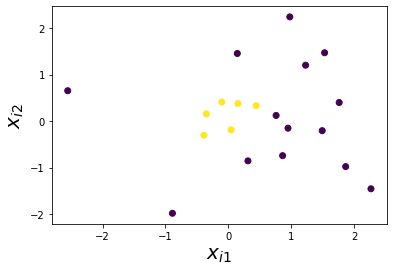

In [3]:
n = 20
d = 2
np.random.seed(0)
X = np.random.randn(n,d)
y = np.sum(X**2,axis=1) < 0.4

plt.scatter(X[:,0], X[:,1], c=y);
plt.xlabel("$x_{i1}$", fontsize=20);
plt.ylabel("$x_{i2}$", fontsize=20);

Training accuracy 0.7


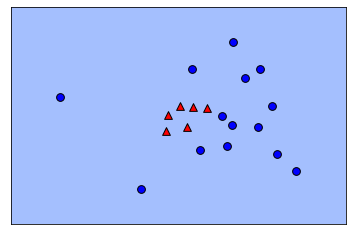

In [4]:
svm = SVC(kernel="linear")
svm.fit(X,y)

plot_classifier(X,y,svm)

print("Training accuracy", svm.score(X,y))

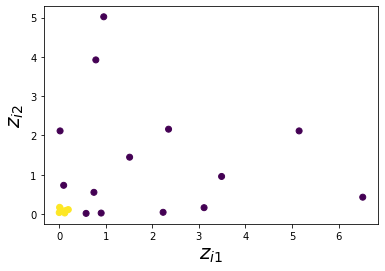

In [5]:
Z = X**2

plt.scatter(Z[:,0], Z[:,1], c=y);
plt.xlabel("$z_{i1}$", fontsize=20);
plt.ylabel("$z_{i2}$", fontsize=20);

Training accuracy 1.0


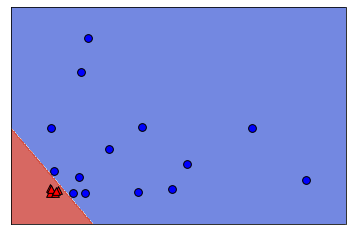

In [6]:
svm = SVC(kernel="linear", C=100)
svm.fit(Z,y)

plot_classifier(Z,y,svm)

print("Training accuracy", svm.score(Z,y))

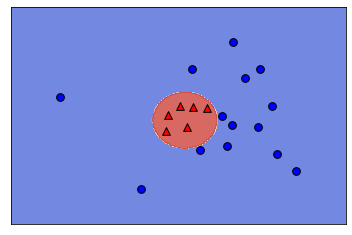

In [7]:
plot_classifier(X, y, svm, transformation=lambda X: X**2);